In [1]:
#annotation distribution through time (yc)
#annotation distribution for different categories (yc)

'''
index 0 = Style
index 1 = Category
index 2 = Artist
index 3 = Title
index 4 = Year
index 5 = Image URL
index 6 = Painting Info URL
index 7 = Artist Info URL
index 8 = Is painting
index 9 = Face or body
index 10 = Mean rating
index 11 = Agreeableness
index 12 = Anger
index 13 = Anticipation
index 14 = Arrogance
index 15 = Disagreeableness
index 16 = Disgust
index 17 = Fear
index 18 = Gratitude
index 19 = Happiness
index 20 = Humility
index 21 = Love
index 22 = Optimism
index 23 = Pessimism
index 24 = Regret
index 25 = Sadness
index 26 = Shame
index 27 = Shyness
index 28 = Surprise
index 29 = Trust
index 30 = Neutral
'''

'\nindex 0 = Style\nindex 1 = Category\nindex 2 = Artist\nindex 3 = Title\nindex 4 = Year\nindex 5 = Image URL\nindex 6 = Painting Info URL\nindex 7 = Artist Info URL\nindex 8 = Is painting\nindex 9 = Face or body\nindex 10 = Mean rating\nindex 11 = Agreeableness\nindex 12 = Anger\nindex 13 = Anticipation\nindex 14 = Arrogance\nindex 15 = Disagreeableness\nindex 16 = Disgust\nindex 17 = Fear\nindex 18 = Gratitude\nindex 19 = Happiness\nindex 20 = Humility\nindex 21 = Love\nindex 22 = Optimism\nindex 23 = Pessimism\nindex 24 = Regret\nindex 25 = Sadness\nindex 26 = Shame\nindex 27 = Shyness\nindex 28 = Surprise\nindex 29 = Trust\nindex 30 = Neutral\n'

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df[]

In [4]:
df = pd.read_csv('WikiArtClean.csv')
annotations = ['Agreeableness', 'Anger', 'Anticipation', 'Arrogance',
       'Disagreeableness', 'Disgust', 'Fear', 'Gratitude', 'Happiness',
       'Humility', 'Love', 'Optimism', 'Pessimism', 'Regret', 'Sadness',
       'Shame', 'Shyness', 'Surprise', 'Trust', 'Neutral']
df['Max_annotation'] = df[annotations].idxmax(axis=1)
df['century'] = (df['Year']-1)//100 + 1
df.columns

Index(['Style', 'Category', 'Artist', 'Title', 'Year', 'Image URL',
       'Painting Info URL', 'Artist Info URL', 'Is painting', 'Face or body',
       'Mean rating', 'Agreeableness', 'Anger', 'Anticipation', 'Arrogance',
       'Disagreeableness', 'Disgust', 'Fear', 'Gratitude', 'Happiness',
       'Humility', 'Love', 'Optimism', 'Pessimism', 'Regret', 'Sadness',
       'Shame', 'Shyness', 'Surprise', 'Trust', 'Neutral', 'Max_annotation',
       'century'],
      dtype='object')

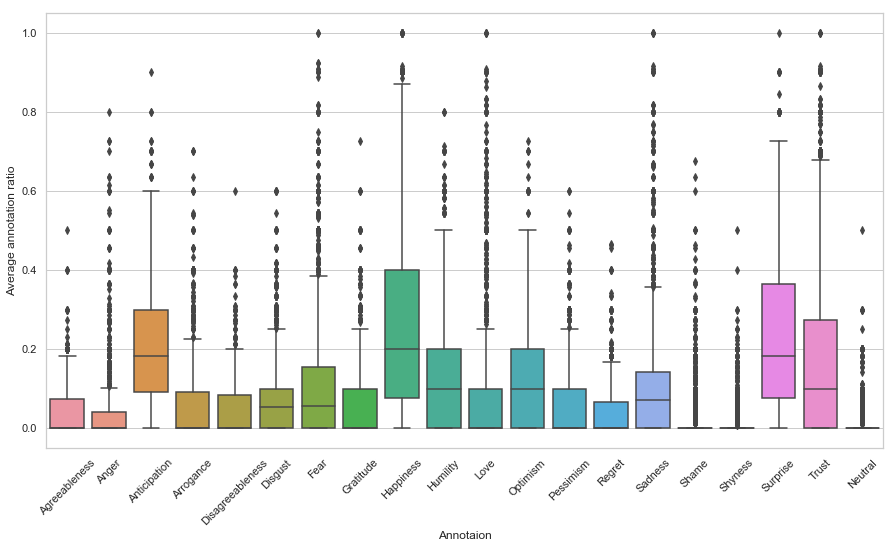

In [11]:
plt.figure(figsize = (15,8))
annotations = ['Agreeableness', 'Anger', 'Anticipation', 'Arrogance',
       'Disagreeableness', 'Disgust', 'Fear', 'Gratitude', 'Happiness',
       'Humility', 'Love', 'Optimism', 'Pessimism', 'Regret', 'Sadness',
       'Shame', 'Shyness', 'Surprise', 'Trust', 'Neutral']
sns.set(style="whitegrid")
ax = sns.boxplot(data=df[annotations])

plt.xticks(rotation=45)
plt.xlabel('Annotaion')
plt.ylabel('Average annotation ratio')
plt.savefig('Average annotation ratio by category.png')
plt.show()

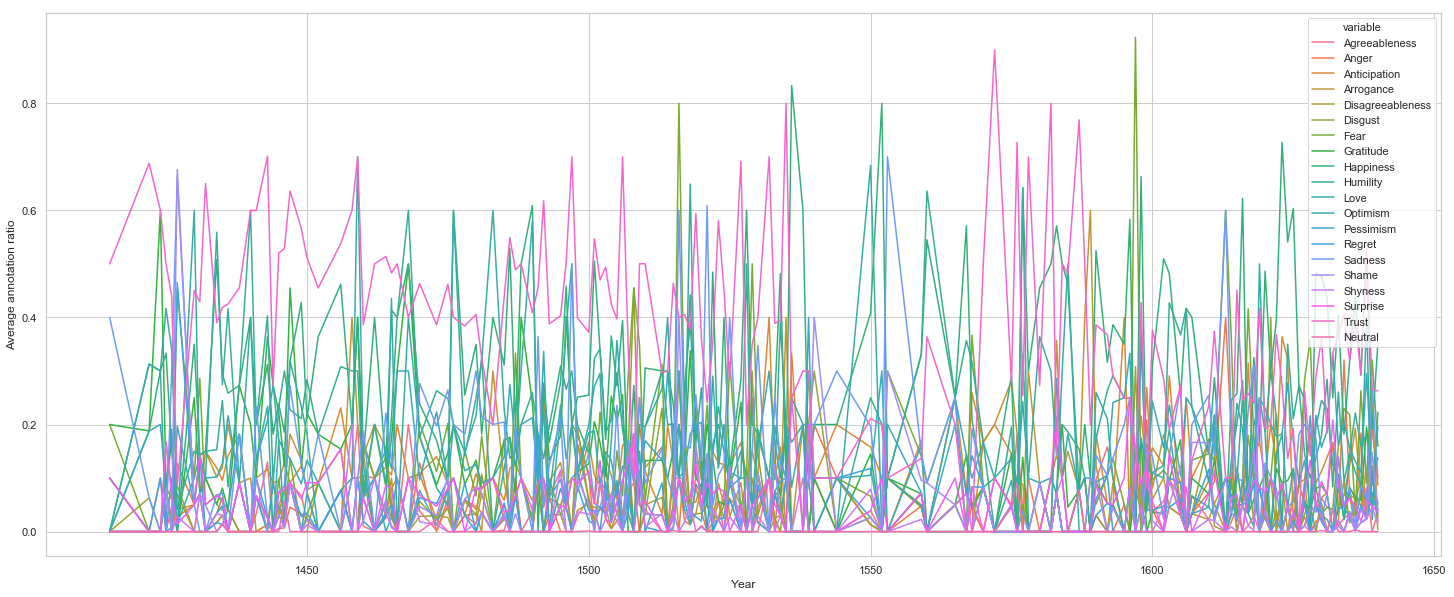

In [6]:
plt.figure(figsize=(25,10))
df_annotation_year = df[df['Year']<=1640].groupby('Year')[annotations].mean().reset_index()
sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(df_annotation_year, ['Year']),legend='brief')
plt.ylabel('Average annotation ratio')
plt.show()

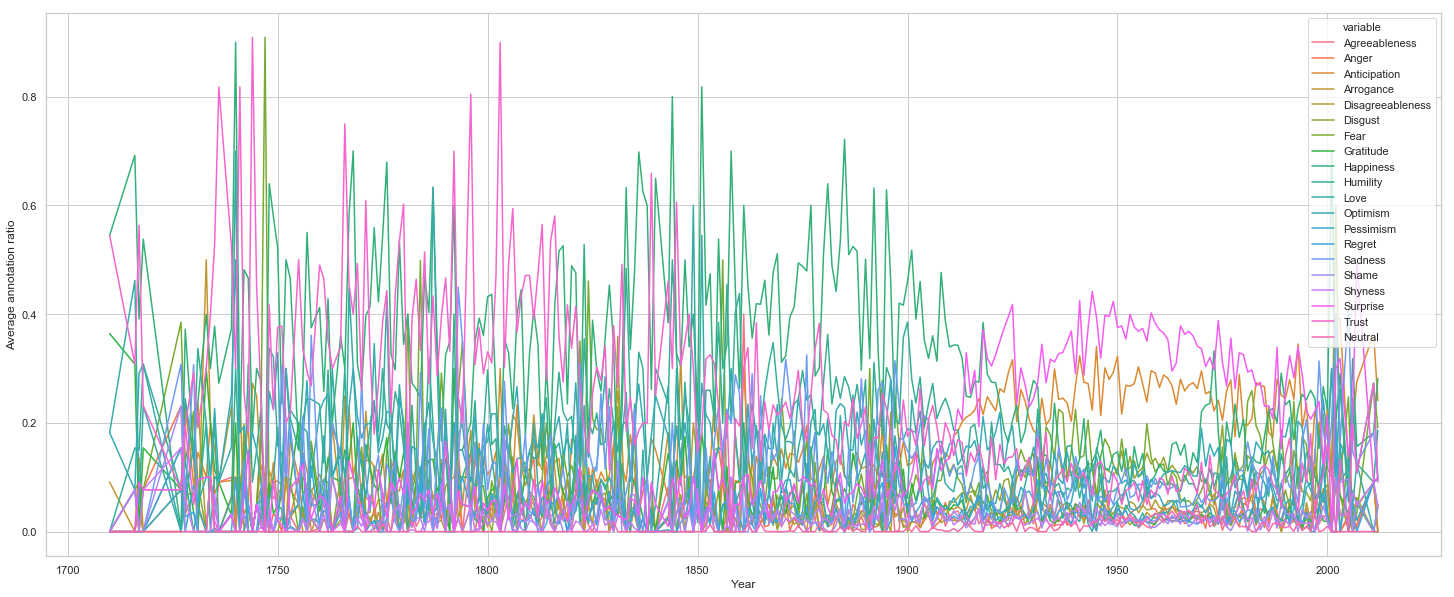

In [7]:
plt.figure(figsize=(25,10))
df_annotation_year = df[df['Year']>=1710].groupby('Year')[annotations].mean().reset_index()
sns.lineplot(x='Year', y='value', hue='variable', 
             data=pd.melt(df_annotation_year, ['Year']),legend='brief')
plt.ylabel('Average annotation ratio')
plt.show()

In [8]:
cat_many = df['Category'].value_counts().loc[lambda x : x>10].index.tolist()
df_cat_ann = df[df['Category'].isin(cat_many)].groupby(['Category','Max_annotation']).size().reset_index(name='count')

In [9]:
df_ann_century = df.groupby('century')[annotations].mean().reset_index()

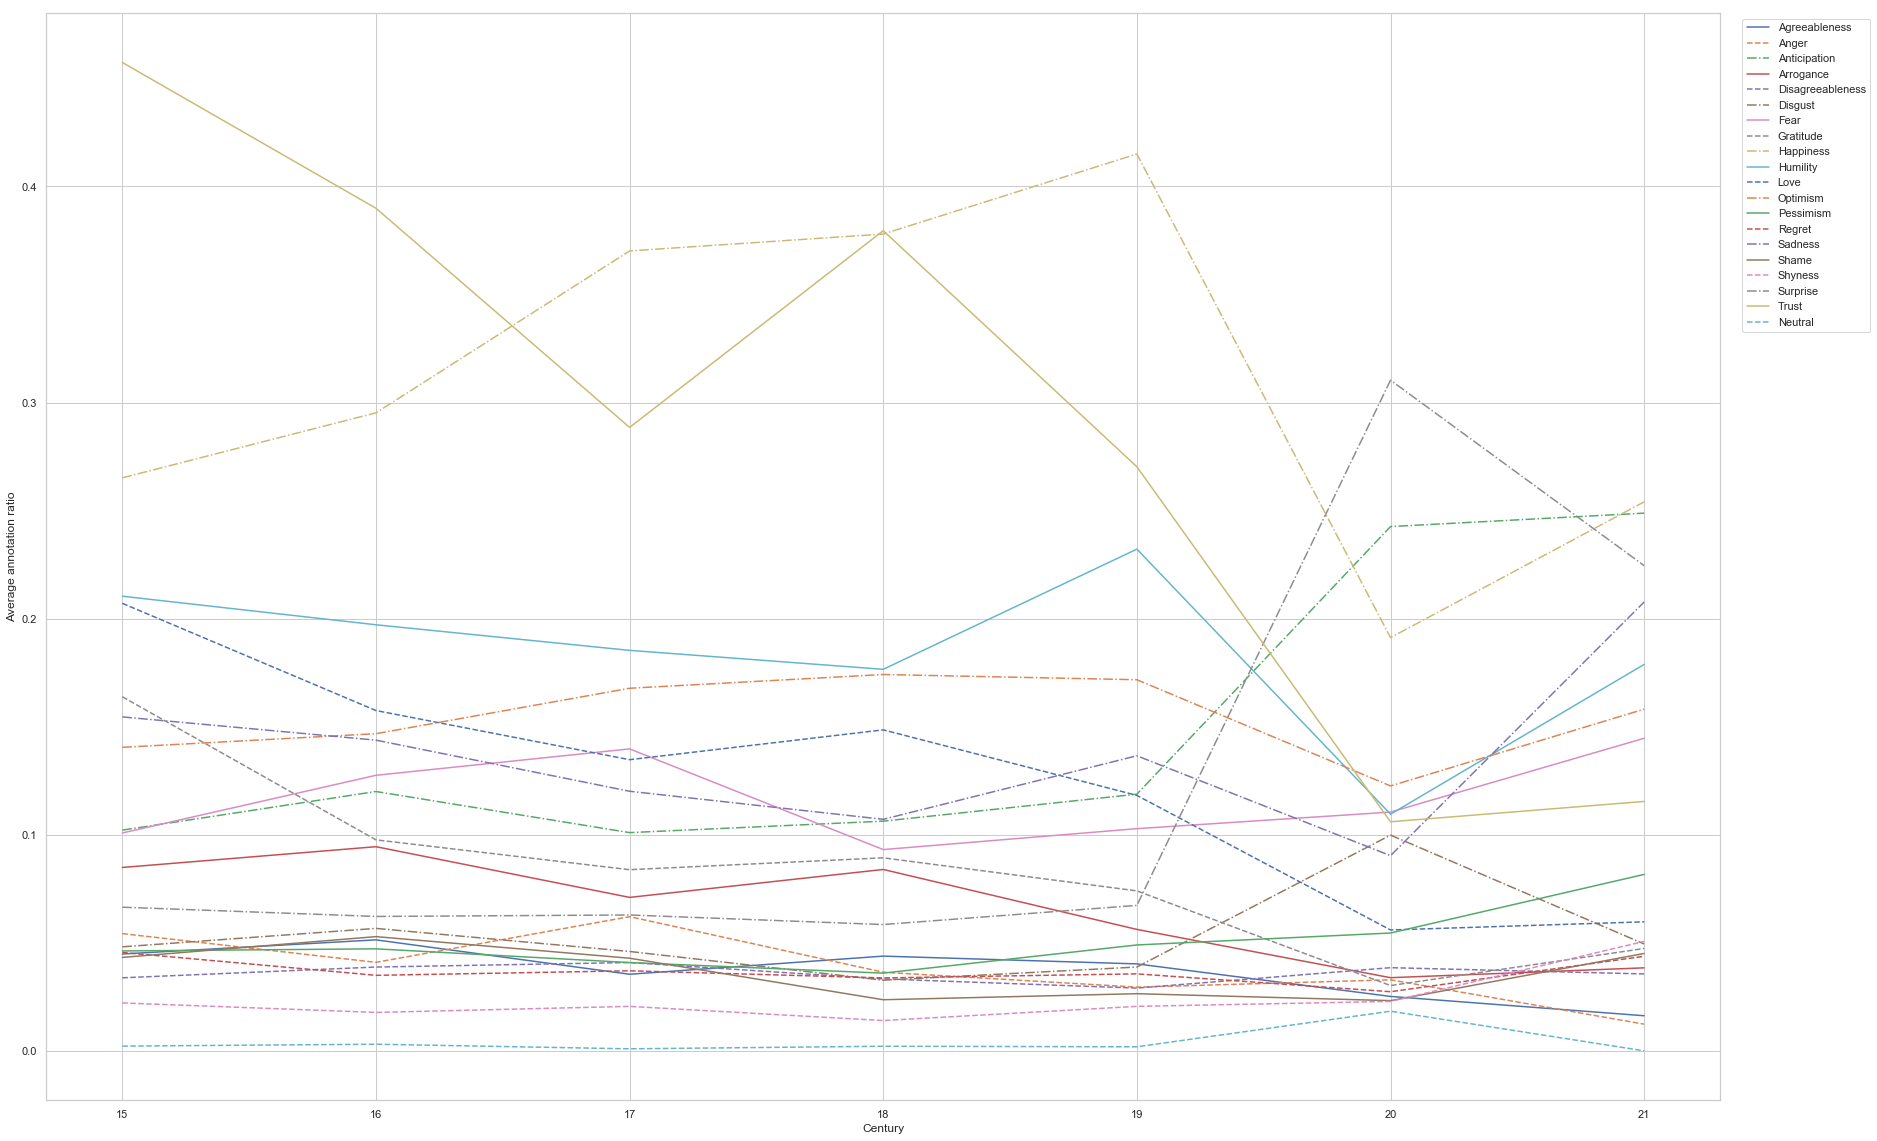

In [61]:

#fig,ax = plt.subplots()
plt.figure(figsize=(30,20))
df_tmp = pd.melt(df_ann_century, ['century'])
fmt = ['-', '--', '-.', ':']
for i,name in enumerate(annotations):
    
    plt.plot(df_tmp[df_tmp.variable==name].century,df_tmp[df_tmp.variable==name].value,linestyle = fmt[i%3],label=name)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.xlabel('Century')
plt.ylabel('Average annotation ratio')
plt.savefig('annotation_by_century.png')
plt.show()